# XGBoost versus equiprobable XOR

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import xgboost

Create a random sample X of features $x \in \left[ 0,1 \right[ \times \left[ 0,1 \right[$ :

In [6]:
X = rnd.rand( 100, 2 )

Calculate output for a XOR gate:

y = np.logical_xor( X[:,0]>0.5, X[:,1]>0.5 )

Select negative and positive samples:

In [14]:
X_pos = X[ y ]
X_neg = X[ ~y ]

Sample scatter plot:

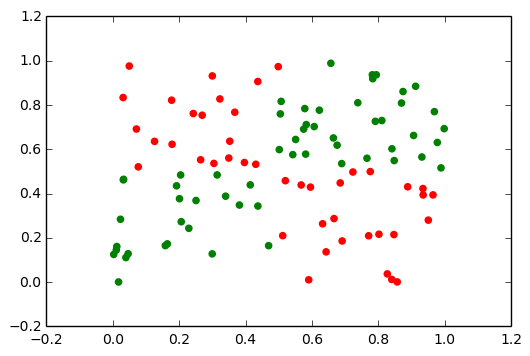

In [16]:
plt.scatter( X_pos[:, 0], X_pos[:, 1], color='red' )
plt.scatter( X_neg[:, 0], X_neg[:, 1], color='green' )
plt.show()

Use a xgboost classifier with only one tree on our sample, leading to a perfect prediction:

In [18]:
model = xgboost.XGBClassifier(n_estimators = 1)
model.fit(X, y)
print 'Accuracy : ', np.mean( model.predict(X) == y )

Accuracy :  1.0


Do it again with the same number of sample for each features combination:

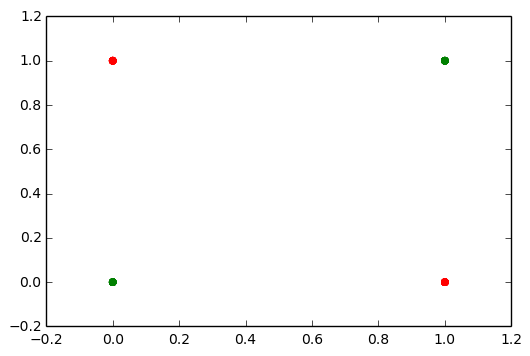

Accuracy :  0.5


In [24]:
X = np.array( [[0,0], [1,0], [0,1], [1,1]] )
for i in xrange(4) : X = np.vstack( (X, X) )

y = np.logical_xor( X[:,0]>0.5, X[:,1]>0.5 )
X_pos = X[ y ]
X_neg = X[ ~y ]
plt.scatter( X_pos[:, 0], X_pos[:, 1], color='red' )
plt.scatter( X_neg[:, 0], X_neg[:, 1], color='green' )
plt.show()

model = xgboost.XGBClassifier(n_estimators = 1)
model.fit(X, y)
print 'Accuracy : ', np.mean( model.predict(X) == y )

Indeed, the gain is always zero whatever the split !  
We can use a subsample value different from 1 to break the symmetry:

In [25]:
model = xgboost.XGBClassifier(n_estimators = 1, subsample = 0.9)
model.fit(X, y)
print 'Accuracy : ', np.mean( model.predict(X) == y )

Accuracy :  1.0
